In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('data.csv')

In [48]:
df['id'] = range(1, len(df) + 1)

In [49]:
df

,directors,stars,genres,title,id
0,Urban Gad|,Asta Nielsen|Valdemar Psilander|Gunnar Helsengreen,Drama,den sorte drøm,1
1,Urban Gad,Asta Nielsen|Max Obal|Robert Valberg,Drama,die verräterin,2
2,Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama History,cleopatra,3
3,Francesco Bertolini|Adolfo Padovan|Giuseppe de Liguoro,Salvatore Papa|Arturo Pirovano|Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,4
4,Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama,den flyvende cirkus,5
...,...,...,...,...,...
126686,Pernilla August|,Sverrir Gudnason|Karin Franz Körlof|Liv Mjönes,Drama Romance,den allvarsamma leken,126687
126687,Antoni Nykowski|,Mateusz Janicki|Sandra Drzymalska|Maria Debska,Adventure Drama Family,pan samochodzik i templariusze,126688
126688,Thierry Poiraud|Benjamin Rocher|,Alban Lenoir|Charlie Bruneau|Tiphaine Daviot,Comedy Horror,goal of the dead,126689
126689,Estela Renner|,unknown,Documentary,muito além do peso,126690


In [50]:
pd.set_option('display.max_colwidth', 75)

In [51]:
df

,directors,stars,genres,title,id
0,Urban Gad|,Asta Nielsen|Valdemar Psilander|Gunnar Helsengreen,Drama,den sorte drøm,1
1,Urban Gad,Asta Nielsen|Max Obal|Robert Valberg,Drama,die verräterin,2
2,Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama History,cleopatra,3
3,Francesco Bertolini|Adolfo Padovan|Giuseppe de Liguoro,Salvatore Papa|Arturo Pirovano|Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,4
4,Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama,den flyvende cirkus,5
...,...,...,...,...,...
126686,Pernilla August|,Sverrir Gudnason|Karin Franz Körlof|Liv Mjönes,Drama Romance,den allvarsamma leken,126687
126687,Antoni Nykowski|,Mateusz Janicki|Sandra Drzymalska|Maria Debska,Adventure Drama Family,pan samochodzik i templariusze,126688
126688,Thierry Poiraud|Benjamin Rocher|,Alban Lenoir|Charlie Bruneau|Tiphaine Daviot,Comedy Horror,goal of the dead,126689
126689,Estela Renner|,unknown,Documentary,muito além do peso,126690


In [52]:
# Define the maximum number of expected actors
max_actors = 3
actor_columns = [f'actor_{i+1}_name' for i in range(max_actors)]

# Function to split the stars column and limit to max_actors
def split_actors(stars, max_actors):
    actors = stars.split('|')
    # If there are fewer actors than max_actors, fill the remaining with None
    if len(actors) < max_actors:
        actors += [None] * (max_actors - len(actors))
    return actors[:max_actors]

# Apply the split_actors function to the stars column and create new actor columns
df[actor_columns] = df['stars'].apply(lambda x: pd.Series(split_actors(x, max_actors)))

# Strip any extra spaces around actor names
df[actor_columns] = df[actor_columns].apply(lambda col: col.str.strip().str.strip("'"))

# Display the resulting DataFrame
df

,directors,stars,genres,title,id,actor_1_name,actor_2_name,actor_3_name
0,Urban Gad|,Asta Nielsen|Valdemar Psilander|Gunnar Helsengreen,Drama,den sorte drøm,1,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,Urban Gad,Asta Nielsen|Max Obal|Robert Valberg,Drama,die verräterin,2,Asta Nielsen,Max Obal,Robert Valberg
2,Charles L. Gaskill|,Helen Gardner|Pearl Sindelar|Miss Fielding,Drama History,cleopatra,3,Helen Gardner,Pearl Sindelar,Miss Fielding
3,Francesco Bertolini|Adolfo Padovan|Giuseppe de Liguoro,Salvatore Papa|Arturo Pirovano|Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,Alfred Lind|,Rasmus Ottesen|Emilie Otterdahl|Lili Beck,Drama,den flyvende cirkus,5,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...,...
126686,Pernilla August|,Sverrir Gudnason|Karin Franz Körlof|Liv Mjönes,Drama Romance,den allvarsamma leken,126687,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,Antoni Nykowski|,Mateusz Janicki|Sandra Drzymalska|Maria Debska,Adventure Drama Family,pan samochodzik i templariusze,126688,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,Thierry Poiraud|Benjamin Rocher|,Alban Lenoir|Charlie Bruneau|Tiphaine Daviot,Comedy Horror,goal of the dead,126689,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,Estela Renner|,unknown,Documentary,muito além do peso,126690,unknown,None,None


In [53]:
df.drop(columns=['stars'], inplace=True)
df

,directors,genres,title,id,actor_1_name,actor_2_name,actor_3_name
0,Urban Gad|,Drama,den sorte drøm,1,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,Urban Gad,Drama,die verräterin,2,Asta Nielsen,Max Obal,Robert Valberg
2,Charles L. Gaskill|,Drama History,cleopatra,3,Helen Gardner,Pearl Sindelar,Miss Fielding
3,Francesco Bertolini|Adolfo Padovan|Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,Alfred Lind|,Drama,den flyvende cirkus,5,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...
126686,Pernilla August|,Drama Romance,den allvarsamma leken,126687,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,Antoni Nykowski|,Adventure Drama Family,pan samochodzik i templariusze,126688,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,Thierry Poiraud|Benjamin Rocher|,Comedy Horror,goal of the dead,126689,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,Estela Renner|,Documentary,muito além do peso,126690,unknown,None,None


In [54]:
# Define the maximum number of expected directors
max_directors = 2
director_columns = [f'director_{i+1}_name' for i in range(max_directors)]

# Function to split the directors column and limit to max_directors
def split_directors(directors, max_directors):
    if pd.isna(directors) or directors.strip() == "":
        return [None] * max_directors
    # Split by '|', strip extra spaces, and handle cases where there are fewer directors
    directors = [d.strip() for d in directors.split('|') if d.strip()]
    # If there are fewer directors than max_directors, fill the remaining with None
    if len(directors) < max_directors:
        directors += [None] * (max_directors - len(directors))
    return directors[:max_directors]
df = pd.DataFrame(df)

# Apply the split_directors function to the directors column and create new director columns
df[director_columns] = df['directors'].apply(lambda x: pd.Series(split_directors(x, max_directors)))

# Display the resulting DataFrame
df

,directors,genres,title,id,actor_1_name,actor_2_name,actor_3_name,director_1_name,director_2_name
0,Urban Gad|,Drama,den sorte drøm,1,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Urban Gad,None
1,Urban Gad,Drama,die verräterin,2,Asta Nielsen,Max Obal,Robert Valberg,Urban Gad,None
2,Charles L. Gaskill|,Drama History,cleopatra,3,Helen Gardner,Pearl Sindelar,Miss Fielding,Charles L. Gaskill,None
3,Francesco Bertolini|Adolfo Padovan|Giuseppe de Liguoro,Adventure Drama Fantasy,l'inferno,4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Francesco Bertolini,Adolfo Padovan
4,Alfred Lind|,Drama,den flyvende cirkus,5,Rasmus Ottesen,Emilie Otterdahl,Lili Beck,Alfred Lind,None
...,...,...,...,...,...,...,...,...,...
126686,Pernilla August|,Drama Romance,den allvarsamma leken,126687,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes,Pernilla August,None
126687,Antoni Nykowski|,Adventure Drama Family,pan samochodzik i templariusze,126688,Mateusz Janicki,Sandra Drzymalska,Maria Debska,Antoni Nykowski,None
126688,Thierry Poiraud|Benjamin Rocher|,Comedy Horror,goal of the dead,126689,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot,Thierry Poiraud,Benjamin Rocher
126689,Estela Renner|,Documentary,muito além do peso,126690,unknown,None,None,Estela Renner,None


In [55]:
df.drop(columns=['directors'], inplace=True)
df

,genres,title,id,actor_1_name,actor_2_name,actor_3_name,director_1_name,director_2_name
0,Drama,den sorte drøm,1,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Urban Gad,None
1,Drama,die verräterin,2,Asta Nielsen,Max Obal,Robert Valberg,Urban Gad,None
2,Drama History,cleopatra,3,Helen Gardner,Pearl Sindelar,Miss Fielding,Charles L. Gaskill,None
3,Adventure Drama Fantasy,l'inferno,4,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Francesco Bertolini,Adolfo Padovan
4,Drama,den flyvende cirkus,5,Rasmus Ottesen,Emilie Otterdahl,Lili Beck,Alfred Lind,None
...,...,...,...,...,...,...,...,...
126686,Drama Romance,den allvarsamma leken,126687,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes,Pernilla August,None
126687,Adventure Drama Family,pan samochodzik i templariusze,126688,Mateusz Janicki,Sandra Drzymalska,Maria Debska,Antoni Nykowski,None
126688,Comedy Horror,goal of the dead,126689,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot,Thierry Poiraud,Benjamin Rocher
126689,Documentary,muito além do peso,126690,unknown,None,None,Estela Renner,None


In [56]:
df.columns

Index(['genres', 'title', 'id', 'actor_1_name', 'actor_2_name', 'actor_3_name',
       'director_1_name', 'director_2_name'],
      dtype='object')

In [57]:
new_column_order = ['title', 'id', 'genres', 'director_1_name', 'director_2_name', 
                    'actor_1_name', 'actor_2_name', 'actor_3_name']

# Reorder the DataFrame columns
df = df[new_column_order]

In [58]:
df

,title,id,genres,director_1_name,director_2_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,None,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,None,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,None,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Adolfo Padovan,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,None,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,None,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,None,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Benjamin Rocher,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,None,unknown,None,None


In [59]:
df.isnull().sum()

title                  65
id                      0
genres                176
director_1_name         0
director_2_name    115860
actor_1_name            0
actor_2_name         2468
actor_3_name         3446
dtype: int64

<Axes: >

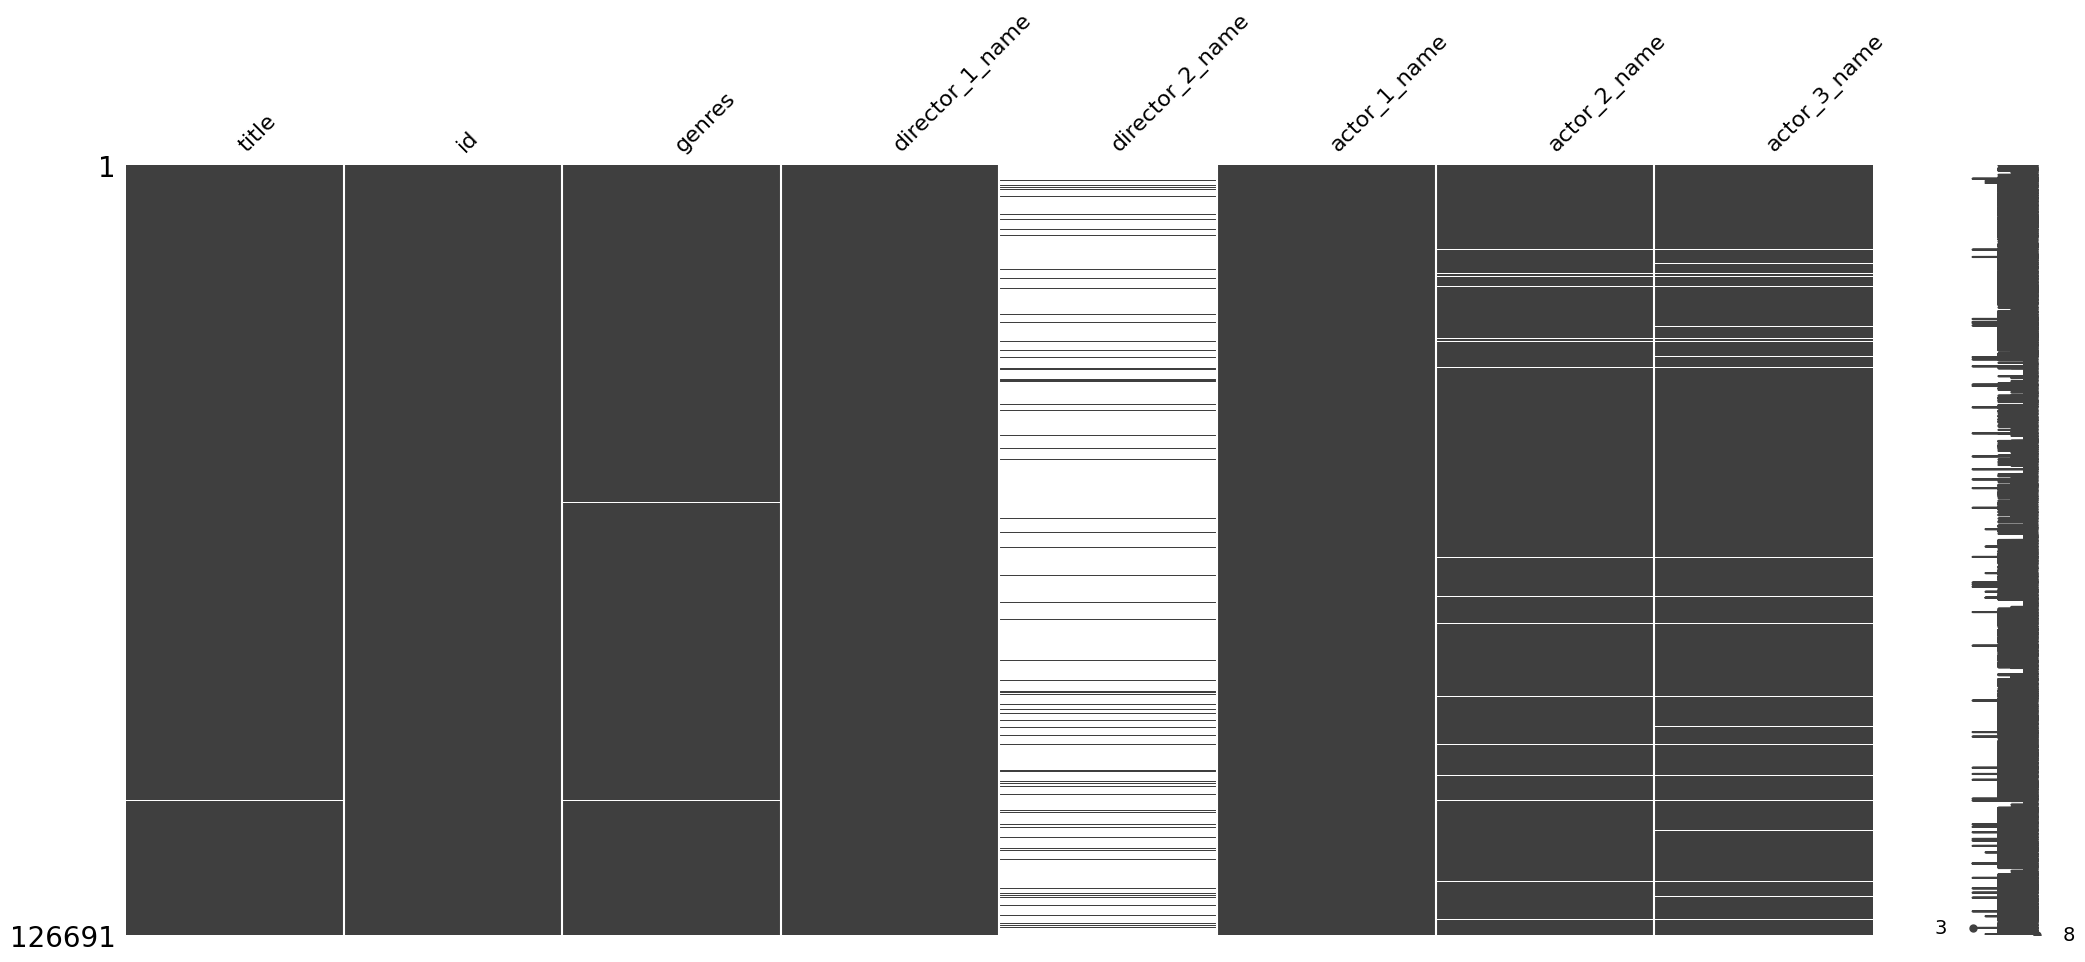

In [60]:
import missingno as msno
msno.matrix(df)

In [61]:
df.columns

Index(['title', 'id', 'genres', 'director_1_name', 'director_2_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name'],
      dtype='object')

In [62]:
df.loc[:, 'title'] = df['title'].fillna('unknown')

In [63]:
df.isnull().sum()

title                   0
id                      0
genres                176
director_1_name         0
director_2_name    115860
actor_1_name            0
actor_2_name         2468
actor_3_name         3446
dtype: int64

In [64]:
df.loc[:, 'actor_2_name'] = df['actor_2_name'].fillna('unknown')
df.loc[:, 'actor_3_name'] = df['actor_3_name'].fillna('unknown')

In [65]:
df.isnull().sum()


title                   0
id                      0
genres                176
director_1_name         0
director_2_name    115860
actor_1_name            0
actor_2_name            0
actor_3_name            0
dtype: int64

In [66]:
df

,title,id,genres,director_1_name,director_2_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,None,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,None,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,None,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Adolfo Padovan,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,None,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,None,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,None,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Benjamin Rocher,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,None,unknown,unknown,unknown


In [69]:
df.columns

Index(['title', 'id', 'genres', 'director_1_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name'],
      dtype='object')

In [70]:
df

,title,id,genres,director_1_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,unknown,unknown,unknown


In [74]:
df_filtered = df[df['title'] != 'unknown']

In [75]:
df = df_filtered
df

,title,id,genres,director_1_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,unknown,unknown,unknown


In [77]:
df.loc[:, 'genres'] = df['genres'].fillna('unknown')
df

,title,id,genres,director_1_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,unknown,unknown,unknown


In [78]:
print("Unique values in 'actor_2_name':", df['actor_2_name'].unique())
print("Unique values in 'actor_3_name':", df['actor_3_name'].unique())

Unique values in 'actor_2_name': ['Valdemar Psilander' 'Max Obal' 'Pearl Sindelar' ... 'Aji Santosa'
 'Karin Franz Körlof' 'Charlie Bruneau']
Unique values in 'actor_3_name': ['Gunnar Helsengreen' 'Robert Valberg' 'Miss Fielding' ... 'Liv Mjönes'
 'Maria Debska' 'Evanne Friedmann']


In [79]:
print("Missing values in 'actor_2_name':", df['actor_2_name'].isna().sum())
print("Missing values in 'actor_3_name':", df['actor_3_name'].isna().sum())


Missing values in 'actor_2_name': 0
Missing values in 'actor_3_name': 0


In [80]:
df

,title,id,genres,director_1_name,actor_1_name,actor_2_name,actor_3_name
0,den sorte drøm,1,Drama,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen
1,die verräterin,2,Drama,Urban Gad,Asta Nielsen,Max Obal,Robert Valberg
2,cleopatra,3,Drama History,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro
4,den flyvende cirkus,5,Drama,Alfred Lind,Rasmus Ottesen,Emilie Otterdahl,Lili Beck
...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,Mateusz Janicki,Sandra Drzymalska,Maria Debska
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot
126689,muito além do peso,126690,Documentary,Estela Renner,unknown,unknown,unknown


In [81]:
print("Descriptive statistics for DataFrame:")
print(df.describe(include='all'))

Descriptive statistics for DataFrame:
         title             id  genres director_1_name actor_1_name  \
count   126624  126624.000000  126624          126624       126624   
unique  118147            NaN    1408           49182        57337   
top       solo            NaN   Drama         unknown      unknown   
freq        12            NaN   16878             784         1287   
mean       NaN   63344.969303     NaN             NaN          NaN   
std        NaN   36572.777853     NaN             NaN          NaN   
min        NaN       1.000000     NaN             NaN          NaN   
25%        NaN   31670.750000     NaN             NaN          NaN   
50%        NaN   63345.500000     NaN             NaN          NaN   
75%        NaN   95015.250000     NaN             NaN          NaN   
max        NaN  126691.000000     NaN             NaN          NaN   

       actor_2_name actor_3_name  
count        126624       126624  
unique        67616        74168  
top         unkn

In [83]:
# If you have filtered or subset the DataFrame, create a copy
df_filtered = df_filtered.copy()

# Now, you can rename columns without warnings
df_filtered.rename(columns={'director_1_name': 'director_name'}, inplace=True)


In [84]:
df = df_filtered

In [85]:
df['comb'] = df['actor_1_name'] + ' ' + df['actor_2_name'] + ' '+ df['actor_3_name'] + ' '+ df['director_name'] +' ' + df['genres']

In [86]:
df

,title,id,genres,director_name,actor_1_name,actor_2_name,actor_3_name,comb
0,den sorte drøm,1,Drama,Urban Gad,Asta Nielsen,Valdemar Psilander,Gunnar Helsengreen,Asta Nielsen Valdemar Psilander Gunnar Helsengreen Urban Gad Drama
1,die verräterin,2,Drama,Urban Gad,Asta Nielsen,Max Obal,Robert Valberg,Asta Nielsen Max Obal Robert Valberg Urban Gad Drama
2,cleopatra,3,Drama History,Charles L. Gaskill,Helen Gardner,Pearl Sindelar,Miss Fielding,Helen Gardner Pearl Sindelar Miss Fielding Charles L. Gaskill Drama His...
3,l'inferno,4,Adventure Drama Fantasy,Francesco Bertolini,Salvatore Papa,Arturo Pirovano,Giuseppe de Liguoro,Salvatore Papa Arturo Pirovano Giuseppe de Liguoro Francesco Bertolini ...
4,den flyvende cirkus,5,Drama,Alfred Lind,Rasmus Ottesen,Emilie Otterdahl,Lili Beck,Rasmus Ottesen Emilie Otterdahl Lili Beck Alfred Lind Drama
...,...,...,...,...,...,...,...,...
126686,den allvarsamma leken,126687,Drama Romance,Pernilla August,Sverrir Gudnason,Karin Franz Körlof,Liv Mjönes,Sverrir Gudnason Karin Franz Körlof Liv Mjönes Pernilla August Drama Ro...
126687,pan samochodzik i templariusze,126688,Adventure Drama Family,Antoni Nykowski,Mateusz Janicki,Sandra Drzymalska,Maria Debska,Mateusz Janicki Sandra Drzymalska Maria Debska Antoni Nykowski Adventur...
126688,goal of the dead,126689,Comedy Horror,Thierry Poiraud,Alban Lenoir,Charlie Bruneau,Tiphaine Daviot,Alban Lenoir Charlie Bruneau Tiphaine Daviot Thierry Poiraud Comedy Horror
126689,muito além do peso,126690,Documentary,Estela Renner,unknown,unknown,unknown,unknown unknown unknown Estela Renner Documentary


In [87]:
df.isna().sum()

title            0
id               0
genres           0
director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
comb             0
dtype: int64

In [88]:
df.to_csv('data.csv',index=False)